In [59]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
from queue import PriorityQueue

In [13]:
# test priority queue
def testing():
    q = PriorityQueue()
    q.put((1, "low value"))
    q.put((5, "medium value"))
    q.put((10, "high value"))
    while(not q.empty()):
        print(q.get())


testing()

(1, 'low value')
(5, 'medium value')
(10, 'high value')


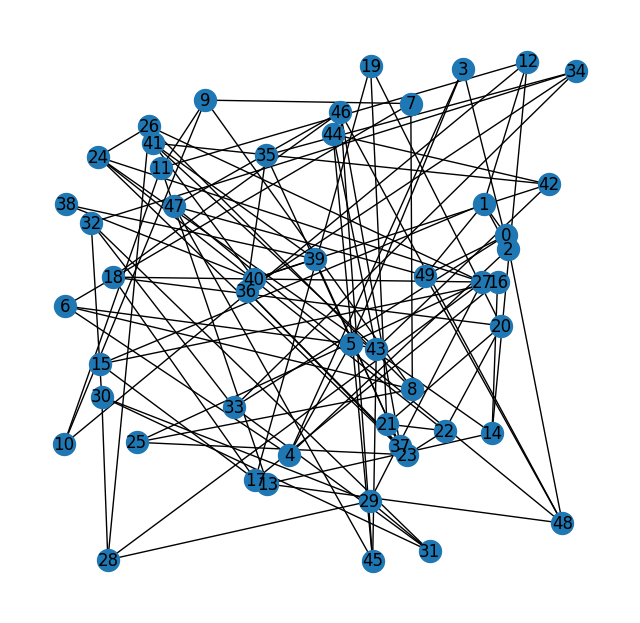

In [70]:
def random_graph(num_vertices, edge_probability, pos_range):
    G = nx.connected_watts_strogatz_graph(num_vertices, 4, edge_probability)

    pos = {node: (random.uniform(*pos_range), random.uniform(*pos_range)) for node in G.nodes()}

    nx.set_node_attributes(G, pos, 'pos')

    

    return G

G = random_graph(50, 0.1, (-100, 100))

pos = nx.get_node_attributes(G, 'pos')
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(G, pos, node_size=250, with_labels=True, ax=ax)
ax.set_aspect('equal')
plt.show()

my cost: 328.3921534915312 // my path: [28, 30, 32, 34]
nx cost: 328.39215349153125 // nx path: [28, 30, 32, 34]


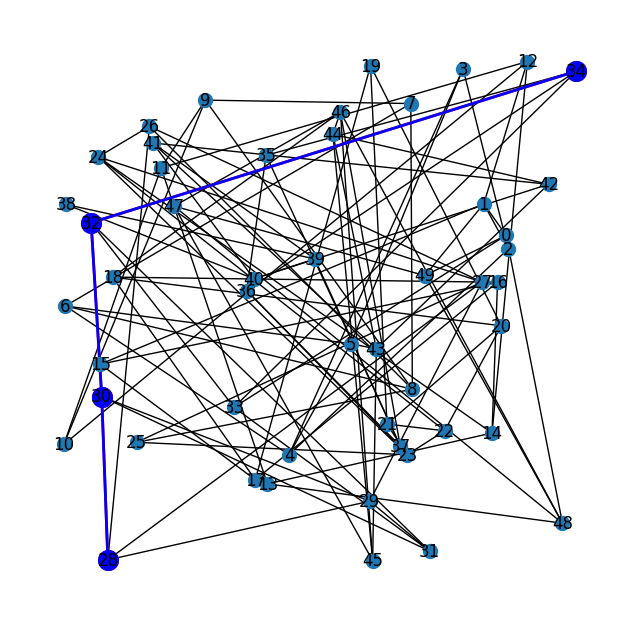

In [116]:
def dist_eq(graph, a, b):
    a_x, a_y = graph.nodes[a]['pos']
    b_x, b_y = graph.nodes[b]['pos']
    return math.sqrt((b_x - a_x) ** 2 + (b_y - a_y) ** 2)

def astar(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put((0, start))

    parent = dict()
    parent[start] = start

    cost = dict()
    cost[start] = 0

    while(not frontier.empty()):
        cur = frontier.get()[1]
        if(cur == goal): break
        for adj in G.neighbors(cur):
            dist = dist_eq(graph, cur, adj)
            new_cost = cost[cur] + dist
            if not adj in cost or cost[adj] > new_cost:
                cost[adj] = new_cost
                parent[adj] = cur
                heur_cost = dist_eq(graph, goal, adj)
                frontier.put((new_cost + heur_cost, adj))

    path = []
    backtrack = goal
    while(True):
        path.append(backtrack)
        if(backtrack == parent[backtrack]): break
        backtrack = parent[backtrack]
    path.reverse()
    return path, cost[goal]

    # print(f"Path found from {start} to {goal} (backwards)")
    # print("------------------------------------------------")
    # backtrack = goal
    # while(True):
    #     print(f"{parent[backtrack]} -> {backtrack} | cost: {cost[backtrack]}")
    #     backtrack = parent[backtrack]
    #     if(backtrack == parent[backtrack]): break

start = 28
goal = 34

my_path, my_path_cost = astar(G, start, goal)
nx_path = nx.astar_path(G, start, goal, heuristic=lambda b, goal: dist_eq(G, b, goal), weight=lambda a, b, d: dist_eq(G, a, b))
nx_path_cost = nx.astar_path_length(G, start, goal, heuristic=lambda b, goal: dist_eq(G, b, goal), weight=lambda a, b, d: dist_eq(G, a, b))

print(f"my cost: {my_path_cost} // my path: {my_path}")
print(f"nx cost: {nx_path_cost} // nx path: {nx_path}")
    
# Visualize the graph and highlight the paths
pos = nx.get_node_attributes(G, 'pos')
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(G, pos, node_size=100, with_labels=True, ax=ax)

# Highlight your path
path_edges = list(zip(my_path, my_path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=my_path, node_color='r', node_size=200, ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2, ax=ax)

# Highlight networkx's path
path_edges = list(zip(nx_path, nx_path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=nx_path, node_color='b', node_size=200, ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='b', width=2, ax=ax)

ax.set_aspect('equal')
plt.show()

In [128]:
num_vertices = 50
G = random_graph(num_vertices, 0.1, (-100, 100))
wrong_count = 0
for start in range(num_vertices - 1):
    for goal in range(num_vertices - 1):
        if start == goal: continue  # path to itself is trivial, ignore
        my_path, my_path_cost = astar(G, start, goal)
        nx_path = nx.astar_path(G, start, goal, heuristic=lambda b, goal: dist_eq(G, b, goal), weight=lambda a, b, d: dist_eq(G, a, b))
        if my_path != nx_path:
            wrong_count = wrong_count + 1
            print(f"incorrect a* found, {start} to {goal}")
            print(f"my path: {my_path}")
            print(f"nx path: {nx_path}")
            print()
if wrong_count == 0:
    print("implementation matches")

implementation matches
